Artist Attribution

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!unzip -q '/content/drive/MyDrive/artists/images.zip' -d '/content' 

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras import layers
import keras

from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os


In [ ]:
artist_data = pd.read_csv("drive/MyDrive/artists/artists.csv")
artist_data[:10]


,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194
5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,Salvador Domingo Felipe Jacinto Dalí i Domènec...,http://en.wikipedia.org/wiki/Salvador_Dalí,139
6,6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,Édouard Manet (US: ; UK: ; French: [edwaʁ manɛ...,http://en.wikipedia.org/wiki/Édouard_Manet,90
7,7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,"Andrei Rublev (Russian: Андре́й Рублёв, IPA: [...",http://en.wikipedia.org/wiki/Andrei_Rublev,99
8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877
9,9,Gustav Klimt,1862 - 1918,"Symbolism,Art Nouveau",Austrian,"Gustav Klimt (July 14, 1862 – February 6, 1918...",http://en.wikipedia.org/wiki/Gustav_Klimt,117


In [ ]:
artist_labels = artist_data['name']
artist_labels

0             Amedeo Modigliani
1            Vasiliy Kandinskiy
2                  Diego Rivera
3                  Claude Monet
4                 Rene Magritte
5                 Salvador Dali
6                 Edouard Manet
7                 Andrei Rublev
8              Vincent van Gogh
9                  Gustav Klimt
10             Hieronymus Bosch
11             Kazimir Malevich
12               Mikhail Vrubel
13                Pablo Picasso
14            Peter Paul Rubens
15        Pierre-Auguste Renoir
16               Francisco Goya
17                  Frida Kahlo
18                     El Greco
19               Albrecht Dürer
20                Alfred Sisley
21               Pieter Bruegel
22                 Marc Chagall
23            Giotto di Bondone
24            Sandro Botticelli
25                   Caravaggio
26            Leonardo da Vinci
27              Diego Velazquez
28                Henri Matisse
29                 Jan van Eyck
30                  Edgar Degas
31      

In [ ]:
imgs = "images/"

idic = {"filename":[], "class":[]}
for fol in os.listdir(imgs):
    if fol.startswith("."):
        continue
    for p in os.listdir(imgs + fol):
        if p.startswith("."):
            continue
        idic["filename"].append(imgs + fol + "/" + p)
        idic["class"].append(fol)
data = pd.DataFrame.from_dict(idic)

data


,filename,class
0,images/Andrei_Rublev/Andrei_Rublev_53.jpg,Andrei_Rublev
1,images/Andrei_Rublev/Andrei_Rublev_52.jpg,Andrei_Rublev
2,images/Andrei_Rublev/Andrei_Rublev_13.jpg,Andrei_Rublev
3,images/Andrei_Rublev/Andrei_Rublev_80.jpg,Andrei_Rublev
4,images/Andrei_Rublev/Andrei_Rublev_77.jpg,Andrei_Rublev
...,...,...
8491,images/Vasiliy_Kandinskiy/Vasiliy_Kandinskiy_6...,Vasiliy_Kandinskiy
8492,images/Vasiliy_Kandinskiy/Vasiliy_Kandinskiy_7...,Vasiliy_Kandinskiy
8493,images/Vasiliy_Kandinskiy/Vasiliy_Kandinskiy_2...,Vasiliy_Kandinskiy
8494,images/Vasiliy_Kandinskiy/Vasiliy_Kandinskiy_8...,Vasiliy_Kandinskiy


probably should plot some stuff too

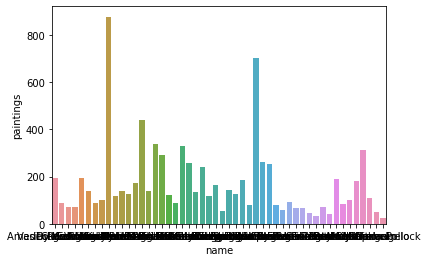

In [ ]:
sns.barplot(data=artist_data, x="name", y="paintings")

Training Models

In [ ]:
batch_size = 64
input_shape = (240, 240, 3)

epochs = 20
steps = 64
num_classes = 50 # current number of artists in the dataset we're using

train, teva = train_test_split(data, test_size=.3)
test, val = train_test_split(teva, test_size = .5)
print(train.shape, test.shape, val.shape)
train_datagen= ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=30,
        width_shift_range=.1,
        height_shift_range=.1,
        vertical_flip=False,
        )

train_datagen = train_datagen.flow_from_dataframe(train,
        target_size=(240, 240),
        batch_size=batch_size,
        class_mode='categorical')
val_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = val_datagen.flow_from_dataframe(val, target_size=(240, 240),
        batch_size=batch_size,
        class_mode='categorical')




(5947, 2) (1274, 2) (1275, 2)
Found 5909 validated image filenames belonging to 50 classes.
Found 1270 validated image filenames belonging to 50 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 38 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 5 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = test_datagen.flow_from_dataframe(test, target_size=(240, 240))

Found 1267 validated image filenames belonging to 50 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 7 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:


def make_basic_model():
    """
    Model with a super basic architecture, probably not that great for this, but it's a start
    adapted from faces classifier from HW 3, which was adapted from: https://keras.io/examples/vision/mnist_convnet/
    """
    model = Sequential(
        [
            layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
            layers.MaxPooling2D(pool_size=(2, 2)),
            
            layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
            layers.MaxPooling2D(pool_size=(2, 2)),
            
            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"),

        ]
    )
    
    return model
    
    

In [ ]:

model = Sequential(
        [
            layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
            layers.MaxPooling2D(pool_size=(2, 2)),
            
            layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
            layers.MaxPooling2D(pool_size=(2, 2)),
            
            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"),

        ]
    )
model.summary()
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
model.fit_generator(train_datagen, steps_per_epoch=32, epochs=epochs, workers=8, validation_data=val_datagen, validation_steps=8)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 238, 238, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 117, 117, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 58, 58, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 215296)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 215296)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)               

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
32/32 [==============================] - 101s 2s/step - loss: 5.9306 - accuracy: 0.0799 - val_loss: 3.5252 - val_accuracy: 0.1660
Epoch 2/20
32/32 [==============================] - 56s 2s/step - loss: 3.3193 - accuracy: 0.1961 - val_loss: 3.2605 - val_accuracy: 0.1816
Epoch 3/20
32/32 [==============================] - 56s 1s/step - loss: 3.1270 - accuracy: 0.1971 - val_loss: 3.1000 - val_accuracy: 0.2012
Epoch 4/20
32/32 [==============================] - 63s 2s/step - loss: 3.0271 - accuracy: 0.2132 - val_loss: 3.1216 - val_accuracy: 0.2246
Epoch 5/20
32/32 [==============================] - 62s 1s/step - loss: 2.8816 - accuracy: 0.2424 - val_loss: 3.0329 - val_accuracy: 0.2344
Epoch 6/20
32/32 [==============================] - 55s 1s/step - loss: 2.8161 - accuracy: 0.2573 - val_loss: 3.3259 - val_accuracy: 0.2227
Epoch 7/20
32/32 [==============================] - 56s 2s/step - loss: 2.7323 - accuracy: 0.2740 - val_loss: 3.1505 - val_accuracy: 0.2598
Epoch 8/20
32/32 [=

In [ ]:
def widenet_model():
    """
    Model with a somewhat more interesting and hopefully better architecture
    """
    
    model = Sequential(
        [
            layers.Conv2D(128, kernel_size=(5,5), activation='relu', input_shape=input_shape),
            layers.MaxPooling2D(pool_size=(2, 2)),
            
            layers.Conv2D(256, kernel_size=(3,3), activation='relu'),
            layers.MaxPooling2D(pool_size=(2, 2)),
            
            
            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"),
            
        ]
        
    ) 
    
    return model
    

In [ ]:
widenet_model = widenet_model()
widenet_model.summary()

widenet_model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
widenet_model.fit(train_datagen, steps_per_epoch=steps, epochs=epochs, validation_data=val_datagen, validation_steps=8, workers=8)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 236, 236, 128)     9728      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 118, 118, 128)     0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 116, 116, 256)     295168    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 58, 58, 256)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 861184)            0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 861184)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 50)               

In [ ]:
def bigger_kernel_model():
    """
    This model has more, and bigger filters. We're thinking this will help to find more broad attributes of the paintings.
    Also each layer has a ton of nodes later on
    """
    
    model = Sequential(
        [
            layers.Conv2D(32, kernel_size=(8,8), activation='relu', input_shape=input_shape),
            layers.MaxPooling2D(pool_size=(2, 2)),
            
            layers.Conv2D(64, kernel_size=(6,6), activation='relu'),
            layers.MaxPooling2D(pool_size=(2, 2)),
            
            layers.Conv2D(128, kernel_size=(4,4), activation='relu'),
            layers.MaxPooling2D(pool_size=(2, 2)),
            
            layers.Conv2D(256, kernel_size=(3,3), activation='relu'),
            layers.MaxPooling2D(pool_size=(2, 2)),
           
            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"),
            
        ]
        
    ) 
    
    return model

In [ ]:
big_model = bigger_kernel_model()
big_model.summary()

big_model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
big_model.fit(train_datagen, steps_per_epoch=64, epochs=epochs, validation_data=val_datagen, validation_steps=8, workers=8)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 233, 233, 32)      6176      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 116, 116, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 111, 111, 64)      73792     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 128)       131200    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 256)      

In [46]:
deepnet_model = Sequential(
        [
            layers.Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=input_shape),
            layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
            layers.Conv2D(32, kernel_size=(1,1), activation='relu'),
            layers.MaxPooling2D(),
         
            layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
            layers.Conv2D(32, kernel_size=(5,5), activation='relu'),
            layers.MaxPooling2D(),
         
            layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
            layers.Conv2D(32, kernel_size=(5,5), activation='relu'),
            layers.MaxPooling2D(),
         
            layers.Conv2D(128, kernel_size=(5,5), activation='relu'),
            layers.MaxPooling2D(),
           
            layers.Flatten(),
            layers.Dropout(0.3),
            layers.Dense(128, activation="relu"),
            layers.Dropout(0.3),
            layers.Dense(64, activation="relu"),
            layers.Dense(num_classes, activation="softmax"),
           
        ])
deepnet_model.summary()

deepnet_model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
deepnet_model.fit(train_datagen, steps_per_epoch=64, epochs=epochs, validation_data=val_datagen, validation_steps=8, workers=8)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 236, 236, 32)      2432      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 234, 234, 32)      9248      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 234, 234, 32)      1056      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 117, 117, 32)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 115, 115, 64)      18496     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 111, 111, 32)      51232     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 55, 55, 32)       

Testing models

In [47]:
models = [model, widenet_model, big_model, deepnet_model]
model_scores = {}

basic_score = model.evaluate_generator(test_datagen)
print("-----------basic model-----------")
print("Test loss: ", basic_score[0])
print("Test accuracy: ", basic_score[1])


widenet_score = widenet_model.evaluate_generator(test_datagen)
print("-----------widenet model-----------")
print("Test loss: ", widenet_score[0])
print("Test accuracy: ", widenet_score[1])

big_score = big_model.evaluate_generator(test_datagen)
print("-----------bigger kernel model-----------")
print("Test loss: ", big_score[0])
print("Test accuracy: ", big_score[1])

deepnet_score = deepnet_model.evaluate_generator(test_datagen)
print("-----------deepnet model-----------")
print("Test loss: ", deepnet_score[0])
print("Test accuracy: ", deepnet_score[1])
      

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


-----------basic model-----------
Test loss:  2.533268928527832
Test accuracy:  0.3275453746318817
-----------widenet model-----------
Test loss:  2.327162027359009
Test accuracy:  0.35674822330474854
-----------bigger kernel model-----------
Test loss:  2.6709682941436768
Test accuracy:  0.288082093000412
-----------deepnet model-----------
Test loss:  3.042539358139038
Test accuracy:  0.19652722775936127


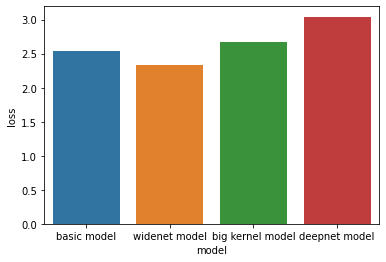

In [48]:
scores = {"model" : ["basic model", "widenet model", "big kernel model", "deepnet model"],
          "loss": [basic_score[0], widenet_score[0], big_score[0], deepnet_score[0]],
          "accuracy": [basic_score[1], widenet_score[1], big_score[1], deepnet_score[1]]}

scores_df = pd.DataFrame(scores)

loss_plot = sns.barplot(data=scores_df, x="model", y="loss")

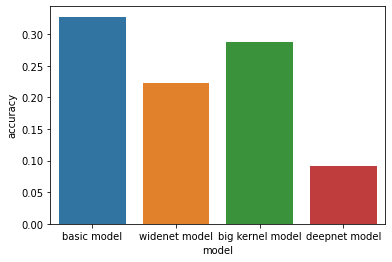

In [ ]:
acc_plot = sns.barplot(data=scores_df, x="model", y="accuracy") 

Things of Interest (papers, dataset)

[The First Main Paper](https://arxiv.org/pdf/1708.00684.pdf)

[Preliminary Research for Experiments](https://www.sicara.ai/blog/2019-10-31-convolutional-layer-convolution-kernel)

[Kaggle Dataset - artists.csv](https://www.kaggle.com/ikarus777/best-artworks-of-all-time)